In [21]:
%pip install --user pandas
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\USUARIO\Desktop\quiniela origen.xlsx")

Note: you may need to restart the kernel to use updated packages.


In [22]:
import scipy as sp
import pickle
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
import itertools
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [23]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix'); 
    

In [24]:
df.drop(['Temporada','Local', 'Visitante', 'V','V.1','E','E.1','D','D.1'], axis=1, inplace=True)

In [25]:
df= df.dropna(subset=['resultado'], axis=0)

In [26]:
df.drop(['Jornada', 'dif.', 'dif..1'], axis=1, inplace=True)

In [27]:
df['Puntos Local']=pd.cut(df['PUNTOS'], bins=3, labels=['menos de 3', 'de 3 a 5', '6 o más'], right=False)
df['Puntos Visitante']=pd.cut(df['PUNTOS.1'], bins=3, labels=['menos de 3', 'de 3 a 5', '6 o más'], right=False)

In [28]:
df.drop(['PUNTOS', 'PUNTOS.1'], axis=1, inplace=True)

In [29]:
#df = df[df['cuartil']!=1]
#df.reset_index(drop=True)

In [30]:
df['GF_local'] = pd.qcut(df['AF'], q= [0, 0.3, 0.6, 1], labels = ['< 1', '1 - 1.5', '> 1.5'])
df['GC_local'] = pd.qcut(df['AC'], q= [0, 0.33, 0.75, 1], labels = ['< 0.929', '0.929 - 1.383', '> 1.383'])
df['GF_visitante'] = pd.qcut(df['AF.1'], q= [0, 0.4, 0.75, 1], labels = ['< 0.9', '0.9 - 1.333', '> 1.333'])
df['GC_visitante'] = pd.qcut(df['AC.1'], q= [0, 0.4, 0.7, 1], labels = ['< 1.2', '1.2 - 1.6', '> 1.6'])

In [31]:
df['sp_L']=pd.qcut(df['partidos consecutivos sin perder'], q= [0, 0.33, 0.66, 1])
df['sp_V']=pd.qcut(df['partidos consecutivos sin perder.1'], q= [0, 0.33, 0.66, 1])

In [32]:
df['resultado'] = df['resultado'].replace(1, 0)

In [33]:
df['resultado'] = df['resultado'].replace(2, 1)

In [34]:
df['último partido'] = df['último partido'].replace(0, 'derrota')
df['último partido'] = df['último partido'].replace(1, 'empate')
df['último partido'] = df['último partido'].replace(3, 'victoria')

In [35]:
df['último partido como local'] = df['último partido como local'].replace(0, 'derrota')
df['último partido como local'] = df['último partido como local'].replace(1, 'empate')
df['último partido como local'] = df['último partido como local'].replace(3, 'victoria')

In [36]:
df

,cuartil,partidos consecutivos sin perder,media de partidos sin ganar,último partido como local,último partido,AF,AC,cuartil.1,partidos consecutivos sin perder.1,media de partidos sin ganar.1,...,AC.1,resultado,Puntos Local,Puntos Visitante,GF_local,GC_local,GF_visitante,GC_visitante,sp_L,sp_V
0,1,6.800000,1.333333,victoria,victoria,2.380000,0.25,2,4.142857,1.555556,...,0.750000,0,6 o más,6 o más,> 1.5,< 0.929,0.9 - 1.333,< 1.2,"(2.962, 6.8]","(2.889, 6.8]"
1,1,6.800000,1.300000,derrota,victoria,1.480000,1.19,2,1.666667,3.625000,...,1.800000,0,6 o más,menos de 3,1 - 1.5,0.929 - 1.383,< 0.9,> 1.6,"(2.962, 6.8]","(1.199, 2.091]"
2,1,4.428571,1.555556,empate,empate,2.420000,1.08,4,2.000000,5.000000,...,1.400000,0,6 o más,de 3 a 5,> 1.5,0.929 - 1.383,< 0.9,1.2 - 1.6,"(2.962, 6.8]","(1.199, 2.091]"
3,3,2.400000,2.250000,victoria,victoria,1.380000,0.63,1,4.428571,1.555556,...,0.710000,1,de 3 a 5,6 o más,1 - 1.5,< 0.929,0.9 - 1.333,< 1.2,"(2.1, 2.962]","(2.889, 6.8]"
4,3,2.555556,2.900000,derrota,derrota,1.640000,1.56,1,6.800000,1.333333,...,0.800000,0,de 3 a 5,6 o más,> 1.5,> 1.383,> 1.333,< 1.2,"(2.1, 2.962]","(2.889, 6.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,4,1.800000,2.250000,empate,victoria,0.666667,1.00,1,2.500000,1.400000,...,0.714286,0,6 o más,de 3 a 5,< 1,0.929 - 1.383,> 1.333,< 1.2,"(1.199, 2.1]","(2.091, 2.889]"
798,3,2.250000,2.250000,derrota,empate,1.714286,1.00,2,2.500000,1.750000,...,0.666667,0,menos de 3,de 3 a 5,> 1.5,0.929 - 1.383,< 0.9,< 1.2,"(2.1, 2.962]","(2.091, 2.889]"
799,1,6.000000,1.500000,empate,derrota,2.333333,1.00,4,2.500000,4.000000,...,1.833333,0,de 3 a 5,de 3 a 5,> 1.5,0.929 - 1.383,< 0.9,> 1.6,"(2.962, 6.8]","(2.091, 2.889]"
800,3,2.000000,4.000000,empate,empate,1.333333,2.00,2,1.800000,2.000000,...,0.750000,1,de 3 a 5,de 3 a 5,1 - 1.5,> 1.383,< 0.9,< 1.2,"(1.199, 2.1]","(1.199, 2.091]"


### Victoria local y empate **(NO PIERDE = 1)**, Victoria visitante **(PIERDE = 0)**

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
Y = df['resultado'].to_numpy()

In [53]:
dummies =  pd.get_dummies(df[['sp_L', 'último partido', 'sp_V', 'Puntos Visitante', 'GF_visitante']])

In [54]:
dummies

,"sp_L_(1.199, 2.1]","sp_L_(2.1, 2.962]","sp_L_(2.962, 6.8]",último partido_derrota,último partido_empate,último partido_victoria,"sp_V_(1.199, 2.091]","sp_V_(2.091, 2.889]","sp_V_(2.889, 6.8]",Puntos Visitante_menos de 3,Puntos Visitante_de 3 a 5,Puntos Visitante_6 o más,GF_visitante_< 0.9,GF_visitante_0.9 - 1.333,GF_visitante_> 1.333
0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
798,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
799,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0
800,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0


In [41]:
cuartil_V = pd.get_dummies(df['cuartil.1'])
cuartil_V

,1,2,3,4
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
797,1,0,0,0
798,0,1,0,0
799,0,0,0,1
800,0,1,0,0


In [86]:
df1 = pd.concat([dummies, cuartil_V], axis =1)

In [109]:
df1

,"sp_L_(1.199, 2.1]","sp_L_(2.1, 2.962]","sp_L_(2.962, 6.8]",último partido_derrota,último partido_empate,último partido_victoria,"sp_V_(1.199, 2.091]","sp_V_(2.091, 2.889]","sp_V_(2.889, 6.8]",Puntos Visitante_menos de 3,Puntos Visitante_de 3 a 5,Puntos Visitante_6 o más,GF_visitante_< 0.9,GF_visitante_0.9 - 1.333,GF_visitante_> 1.333,1,2,3,4
0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0
798,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
799,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
800,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0


df1.drop(['cuartil.1'], axis=1)

In [88]:
X = df1.to_numpy()
X

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [110]:
X_train, X_, Y_train, Y_ = train_test_split( X, Y, test_size=0.2, random_state=1234)
X_cv, X_test, Y_cv, Y_test = train_test_split( X_, Y_, test_size=0.5, random_state=42)

In [106]:
RFC = RandomForestClassifier(max_features = None, max_samples = 59, n_estimators = 256, max_depth = 11, random_state= 176)
RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=11, max_features=None, max_samples=59,
                       n_estimators=256, random_state=176)

In [107]:
print (RFC.score(X_cv, Y_cv),'\n'+str(RFC.score(X_test, Y_test)))

0.85 
0.8518518518518519


with open('RFC_97_19.pkl', 'wb') as file:
    pickle.dump(RFC, file)

In [48]:
yhat_cv = RFC.predict(X_cv)

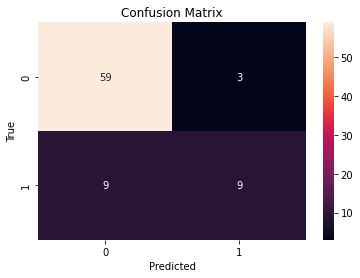

In [49]:
plot_confusion_matrix(Y_cv,yhat_cv)

In [50]:
print(classification_report(Y_cv, yhat_cv))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.75      0.50      0.60        18

    accuracy                           0.85        80
   macro avg       0.81      0.73      0.75        80
weighted avg       0.84      0.85      0.84        80



In [51]:
yhat_test = RFC.predict(X_test)

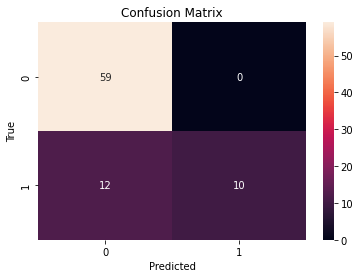

In [52]:
plot_confusion_matrix(Y_test,yhat_test)

In [641]:
print(classification_report(Y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        59
           1       1.00      0.45      0.62        22

    accuracy                           0.85        81
   macro avg       0.92      0.73      0.77        81
weighted avg       0.88      0.85      0.83        81



with open('RFC_B.pkl', 'wb') as file:
    pickle.dump(RFC, file)

In [591]:
with open('RFC_1.pkl', 'rb') as fid:
    RFC_pickle1 = pickle.load(fid)

In [592]:
with open('RFC_5.pkl', 'rb') as fid:
    RFC_pickle5 = pickle.load(fid)

In [593]:
with open('RFC_6.pkl', 'rb') as fid:
    RFC_pickle6 = pickle.load(fid)

In [594]:
with open('RFC_7.pkl', 'rb') as fid:
    RFC_pickle7 = pickle.load(fid)

In [595]:
with open('RFC_8.pkl', 'rb') as fid:
    RFC_pickle8 = pickle.load(fid)

In [596]:
RFC_pickle5

RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=59,
                       n_estimators=256)

In [597]:
RFC_pickle6

RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=59,
                       n_estimators=256)

In [598]:
RFC_pickle7

RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=59,
                       n_estimators=128)

In [599]:
RFC_pickle8

RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=59,
                       n_estimators=256)

# Producción en masa

In [111]:
cv_scores = []
test_scores = []
ies=[]
for i in range(200):
    v = np.random.randint(1, 100+1)
    RFC = RandomForestClassifier(max_features = 'sqrt', max_samples = 59, n_estimators = 256, max_depth = 11, random_state=v)
    RFC.fit(X_train, Y_train)
    cv_score = RFC.score(X_cv, Y_cv)
    test_score = RFC.score(X_test, Y_test)
    ies.append(v)
    cv_scores.append(cv_score)
    test_scores.append(test_score)


In [112]:
zips = tuple(zip(ies, cv_scores, test_scores))
zips

((54, 0.775, 0.8024691358024691),
 (11, 0.775, 0.7901234567901234),
 (31, 0.7875, 0.7777777777777778),
 (87, 0.7625, 0.8395061728395061),
 (97, 0.775, 0.8148148148148148),
 (80, 0.775, 0.7901234567901234),
 (66, 0.7625, 0.7777777777777778),
 (51, 0.775, 0.8395061728395061),
 (76, 0.775, 0.8395061728395061),
 (91, 0.7625, 0.8148148148148148),
 (21, 0.775, 0.7777777777777778),
 (2, 0.7625, 0.8024691358024691),
 (68, 0.775, 0.7777777777777778),
 (25, 0.7875, 0.7901234567901234),
 (29, 0.7875, 0.7777777777777778),
 (76, 0.775, 0.8395061728395061),
 (50, 0.775, 0.7901234567901234),
 (47, 0.7625, 0.8148148148148148),
 (99, 0.775, 0.8148148148148148),
 (15, 0.7625, 0.8148148148148148),
 (73, 0.7625, 0.8271604938271605),
 (98, 0.775, 0.7901234567901234),
 (90, 0.7875, 0.8148148148148148),
 (80, 0.775, 0.7901234567901234),
 (85, 0.775, 0.7901234567901234),
 (42, 0.7875, 0.8395061728395061),
 (79, 0.7875, 0.8148148148148148),
 (91, 0.7625, 0.8148148148148148),
 (38, 0.7625, 0.8024691358024691),


In [512]:
len(cv_scores)

200

In [485]:
cv_scores.sort(reverse=True)
print ('CV, highest score: ' +str(cv_scores[0])+'\nCV, average score: '+str(sum(cv_scores)/len(cv_scores)))

CV, highest score: 0.8625
CV, average score: 0.7880624999999987


In [486]:
test_scores.sort(reverse=True)
print ('Test, highest score: ' +str(test_scores[0])+'\nTest, average score: '+str(sum(test_scores)/len(test_scores)))

Test, highest score: 0.8395061728395061
Test, average score: 0.7795679012345673
